### Titanic with EDA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

sns.set_theme(style='darkgrid', palette='deep', font='NanumGothic')

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df_train = pd.read_csv(rf'C:\Users\perso\.cache\kagglehub\datasets\mustafahakan\titanic-traintest-data\versions\1\train.csv')
df_test = pd.read_csv(rf'C:\Users\perso\.cache\kagglehub\datasets\mustafahakan\titanic-traintest-data\versions\1\test.csv')

#### 데이터 확인

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
## Nan값을 확인
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Initial          0
dtype: int64

##### 생존률
- 그래프를 통해 생존 비율을 확인

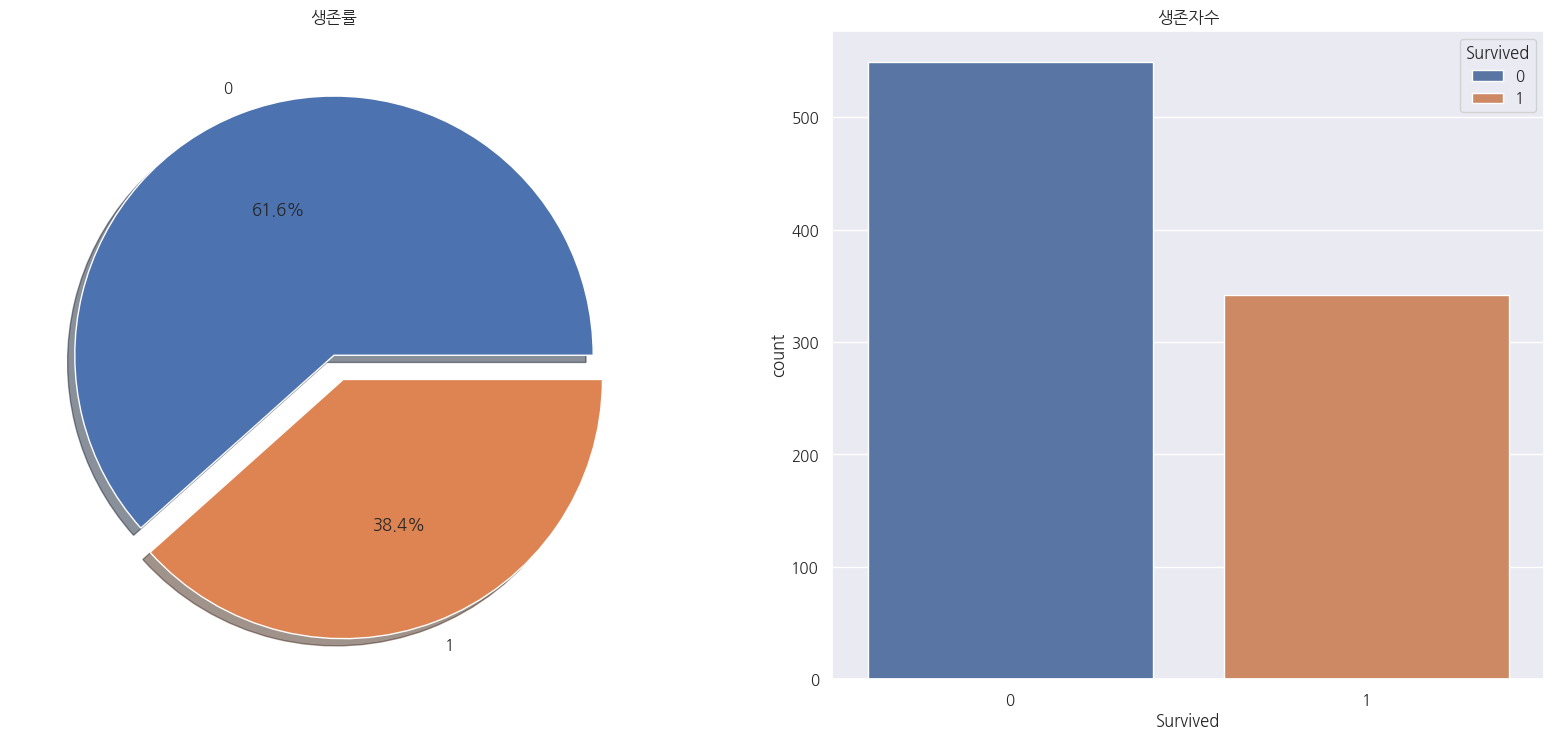

In [19]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('생존률')
ax[0].set_ylabel('')
sns.countplot(df_train, x='Survived', hue='Survived', ax=ax[1])
ax[1].set_title('생존자수')
plt.show()

- 살아남은 승객의 비율이 사망한 승객보다 작음을 알 수 있음(생존자는 전체 891명 중 342명)
- dataset의 생존여부 승객의 data를 각 feature마다 관찰할 것

#### feature
1. Categorical data(범주형 자료)
    - 범주형 자료는 몇개의 범주 또는 항목의 형태로 나타나는 자료로 이 항목들간 순서의 여부에 따라 분류
        1. Ordinal data(순위형 자료) 
            - 순서가 있는 범주형 자료. ex) 1등급, 2등급, 3등급.
            - Titanic - Pclass
        2. Nominal data(명목형 자료)
            - 순서가 없는 범주형 자료. ex) 서울, 대전, 대구, 부산.
            - Titanic - Sex, Embarked
2. Numerical data(수치형 자료)
    - 수치로서 측정되는 자료. 이때, 성질에 따라 다음 두 type으로 분류
        1. Continuous data(연속형 자료)
            - 값이 연속적인 자료. ex) 키, 몸무게.
            - Titanic - Age, Fare
        2. Discrete data(이산형 자료)
            - 셀 수 있는 자료. ex) 불량품 수.
            - Titanic - SibSp, Parch

##### 성별에 따른 생존률

- groupby로 Sex,Survived column에서 Survived를 집계

In [87]:
df_train.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

- 성별에 따른 Survived 비율과 각 성별 Survived 여부를 확인

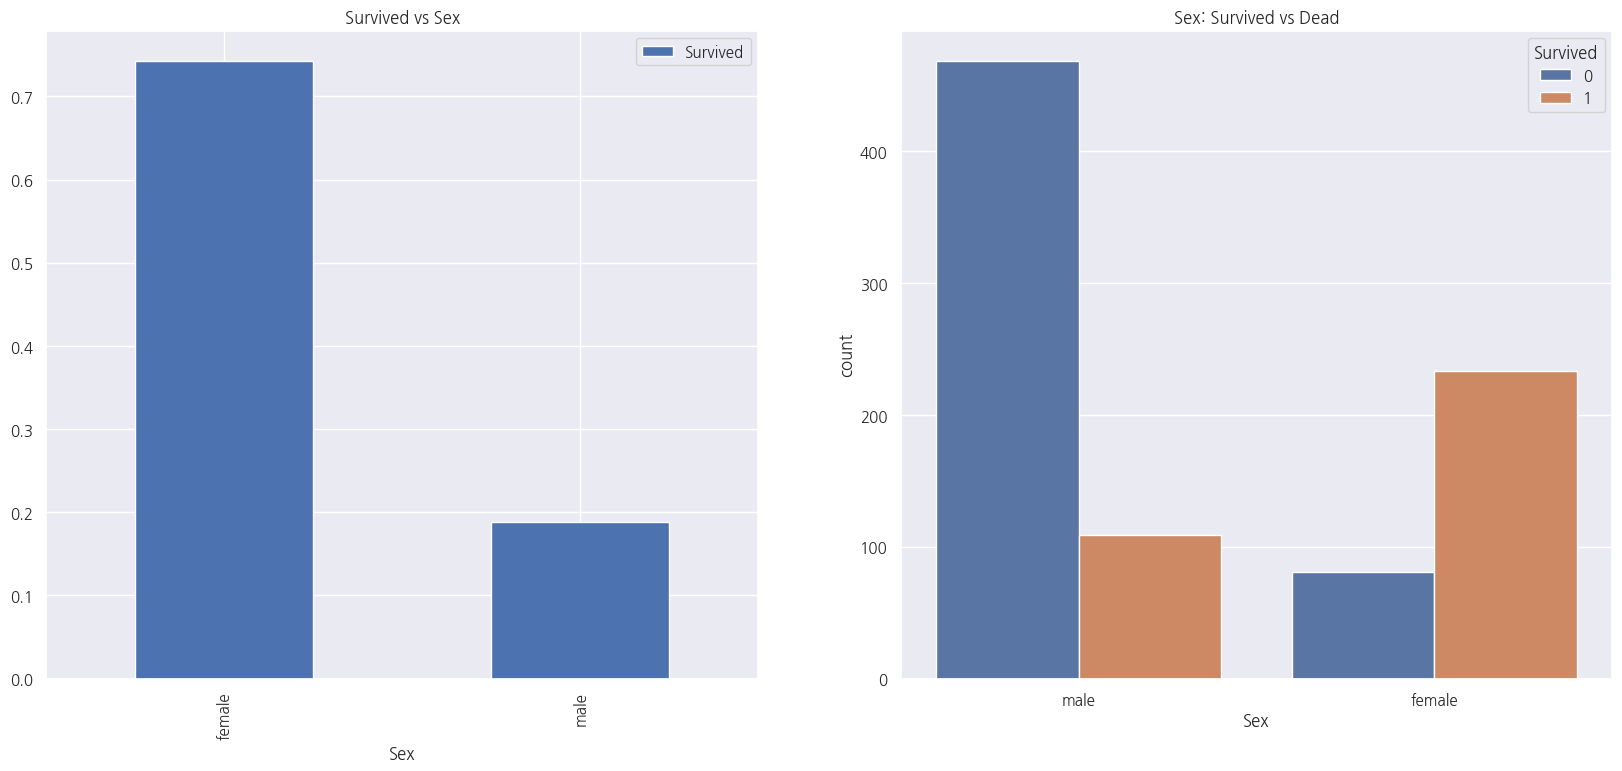

In [22]:
f, ax=plt.subplots(1, 2, figsize=(18,8))
df_train[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(df_train, x='Sex', hue='Survived', ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

- 탑승 전체 비율은 남자가 많지만, 생존자에 여자가 남자의 2배 이상 생존함을 파악
- female중 생존 비율은 약 233/(81+233)=74%
- male중 생존 비율은 약 109/(468+109)=19%

##### PClass

In [23]:
pd.crosstab(df_train.Pclass, df_train.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


- 값이 클수록 색이 진함
    - Pclass 1의 Survived 1과 Pclass 3의 Survived 0의 값이 큼

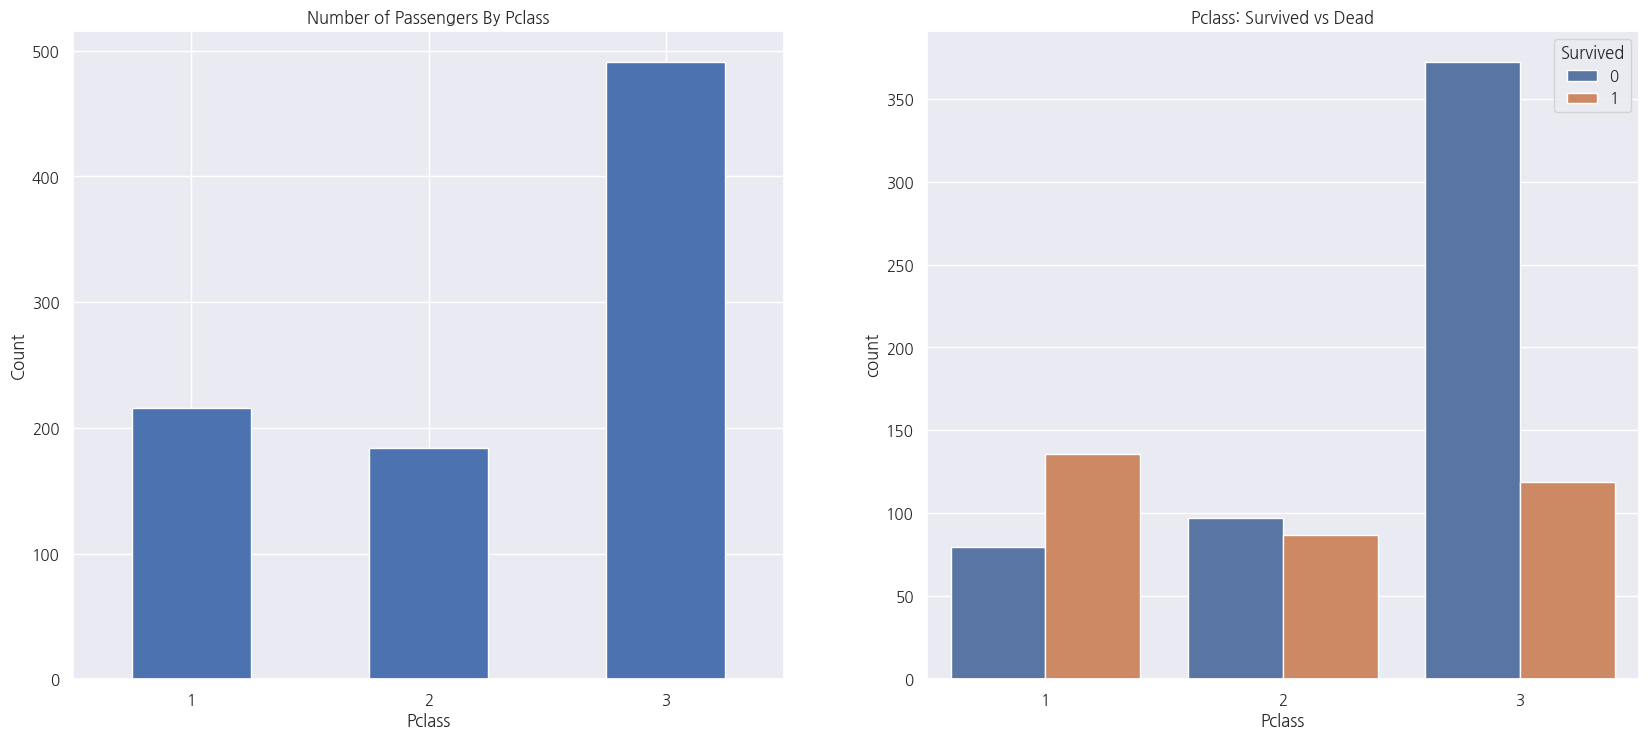

In [24]:
f, ax=plt.subplots(1, 2, figsize=(18,8))
df_train[['Pclass']].value_counts().sort_index().plot.bar(ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
ax[0].set_xticklabels([1,2,3], rotation=0)
sns.countplot(df_train, x='Pclass', hue='Survived', ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

- Pclass:1의 사람들이 높은 구조순위를 가짐
- Pclass:3의 사람들이 Pclass:1보다 훨씬 많이 탔음에도 Pclass:1의 사람들이 더 많이 생존.

In [25]:
df_train[['Pclass','Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


- Pclass:1의 사람들은 절반이 넘는 약 63%가 생존, Pclass:3의 사람들은 약 25%만 생존.

In [26]:
pd.crosstab([df_train.Pclass, df_train.Sex], df_train.Survived, margins=True).style.background_gradient(cmap='summer_r')

- Pclass:1, female 이 가장 많이 생존, Pclass:3, male 이 가장 많이 사먕

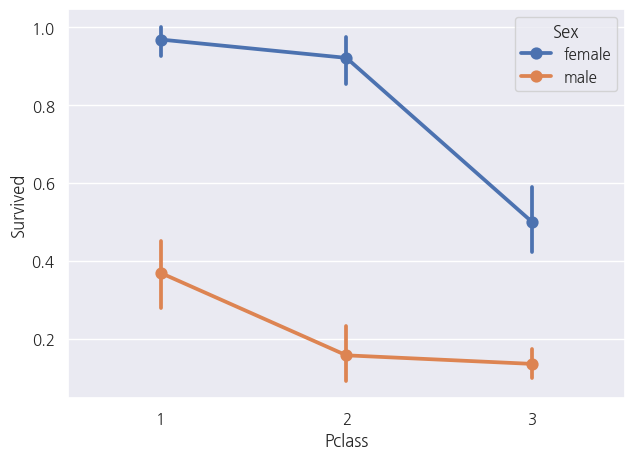

In [ ]:
## factorplot은 없어짐
sns.pointplot(df_train, x='Pclass', y='Survived', hue='Sex')
plt.show()

##### 나이

In [30]:
print('Oldest Passenger\'s age :', df_train['Age'].max())
print('Youngest Passenger\'s age :', df_train['Age'].min())
print('Average Age on the ship :', df_train['Age'].mean())

Oldest Passenger's age : 80.0
Youngest Passenger's age : 0.42
Average Age on the ship : 29.69911764705882


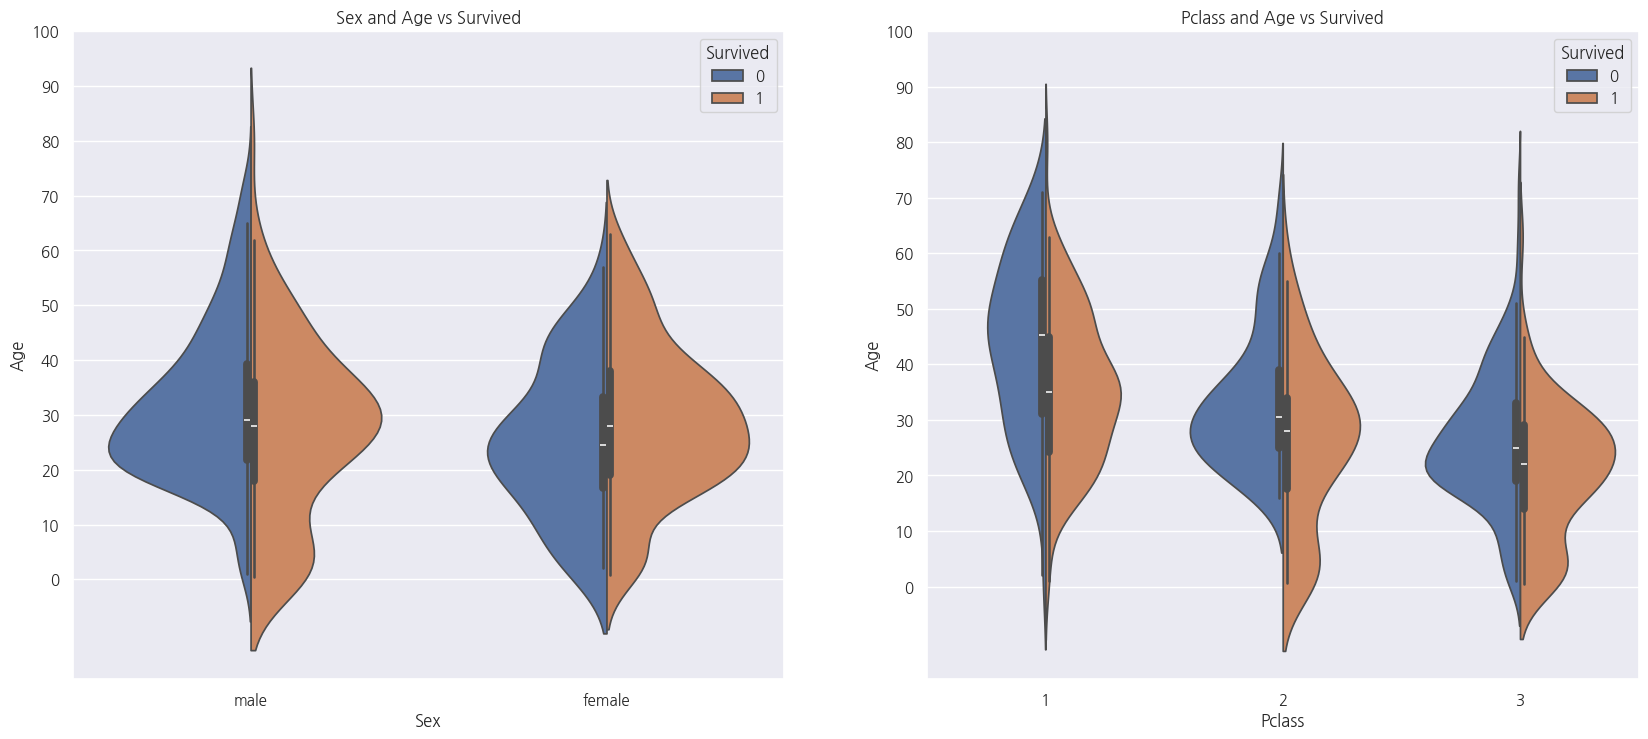

In [31]:
f, ax=plt.subplots(1, 2, figsize=(18,8))
sns.violinplot(df_train, x='Sex', y='Age', hue='Survived', split=True, ax=ax[0])
ax[0].set_title('Sex and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(df_train, x='Pclass', y='Age', hue='Survived', split=True, ax=ax[1])
ax[1].set_title('Pclass and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

- 10살 이하 어린이 수는 Pclass 1, 2, 3 순으로 증가, Pclass에 상관없이 아이들의 생존률은 높다
- 20 ~ 40세의 여성이 우선 구조되었다고 판단

##### FillNan

- Age에 177개의 NaN 존재
- 이 값을 Age 평균으로 채워넣는 것은 좋은 방법이 아님
- Name 내에 Mr, Mrs, 등의 이니셜을 사용 그룹의 평균값을 사용하면 좀 더 높은 정확도를 가질 수 있다고 판단

- 모든 row의 Name에서 Initial역할을 하는 문자열을 추출

In [32]:
df_train['Initial']=0
for i in df_train:
    df_train['Initial']=df_train.Name.str.extract('([A-Za-z]+)\.')
    
pd.crosstab(df_train.Sex, df_train.Initial).style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


-  Mr. Mrs. Miss. Master 이외 이상치 변경 후 평균나이 도출

In [33]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
df_train.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

- 각 그룹 별 평균 나이로 결측치 채움

In [34]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age']=5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age']=22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age']=33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age']=36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age']=46

df_train['Age'].isnull().any()

False

- 나이로 히스토그램 확인

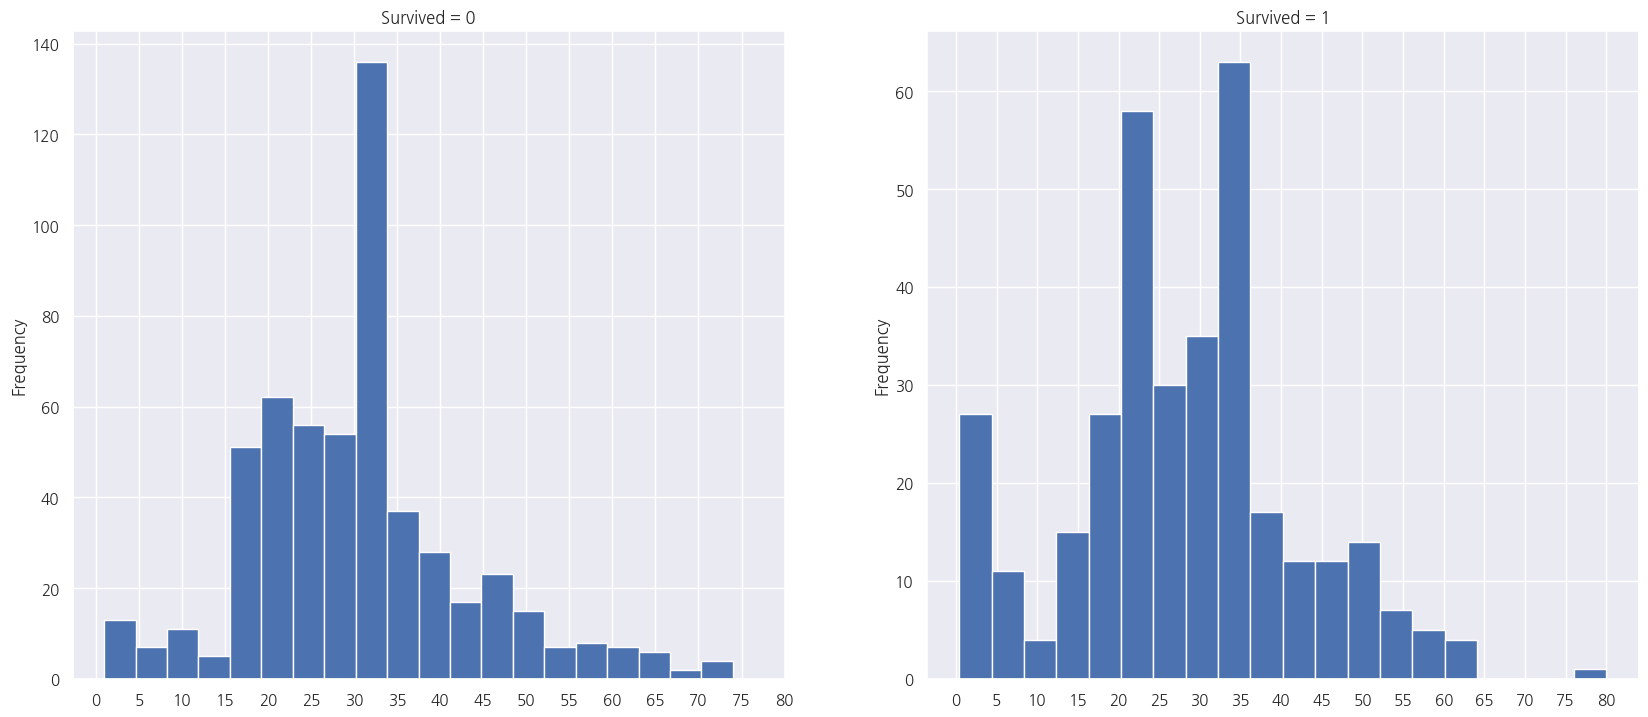

In [37]:
f, ax=plt.subplots(1, 2, figsize=(18, 8))
df_train[df_train['Survived']==0].Age.plot.hist(ax=ax[0], edgecolor='white', bins=20)
ax[0].set_title('Survived = 0')
x_range = list(range(0,85,5))
ax[0].set_xticks(x_range)
df_train[df_train['Survived']==1].Age.plot.hist(ax=ax[1], edgecolor='white', bins=20)
ax[1].set_title('Survived = 1')
ax[1].set_xticks(x_range)
plt.show()

- 5세 이하의 아이는 대부분 생존
- 최고령 승객(80세)은 생존
- 30 ~ 35세 그룹이 가장 많이 사망

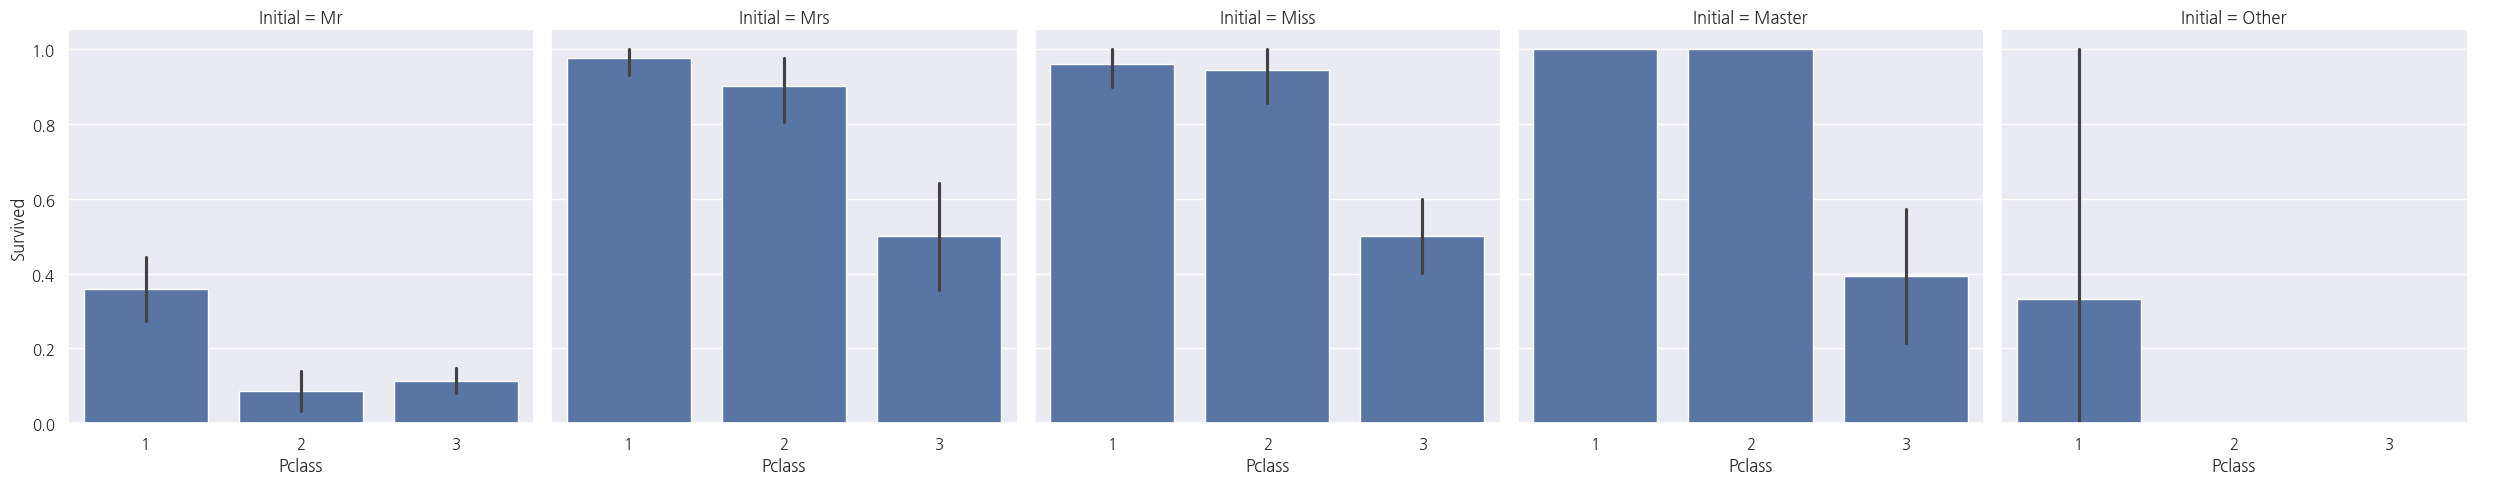

In [53]:
sns.catplot(df_train, x='Pclass', y='Survived', col='Initial', kind='bar')
plt.show()

##### 탑승항

- Embarked 컬럼 분석
- C = Cherbourg, Q = Queenstown, S = Southampton

In [54]:
pd.crosstab([df_train.Embarked, df_train.Pclass], [df_train.Sex, df_train.Survived], margins=True).style.background_gradient(cmap='summer_r')

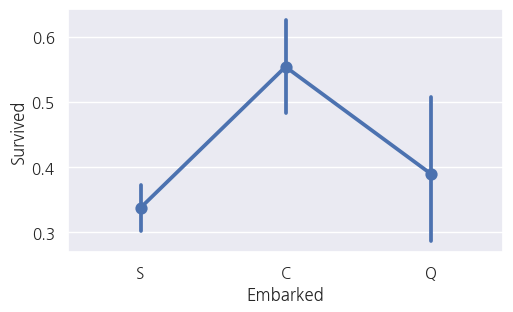

In [56]:
sns.pointplot(df_train, x='Embarked', y='Survived')
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

- C 에서 승선한 승객들의 생존비율이 가장 높음

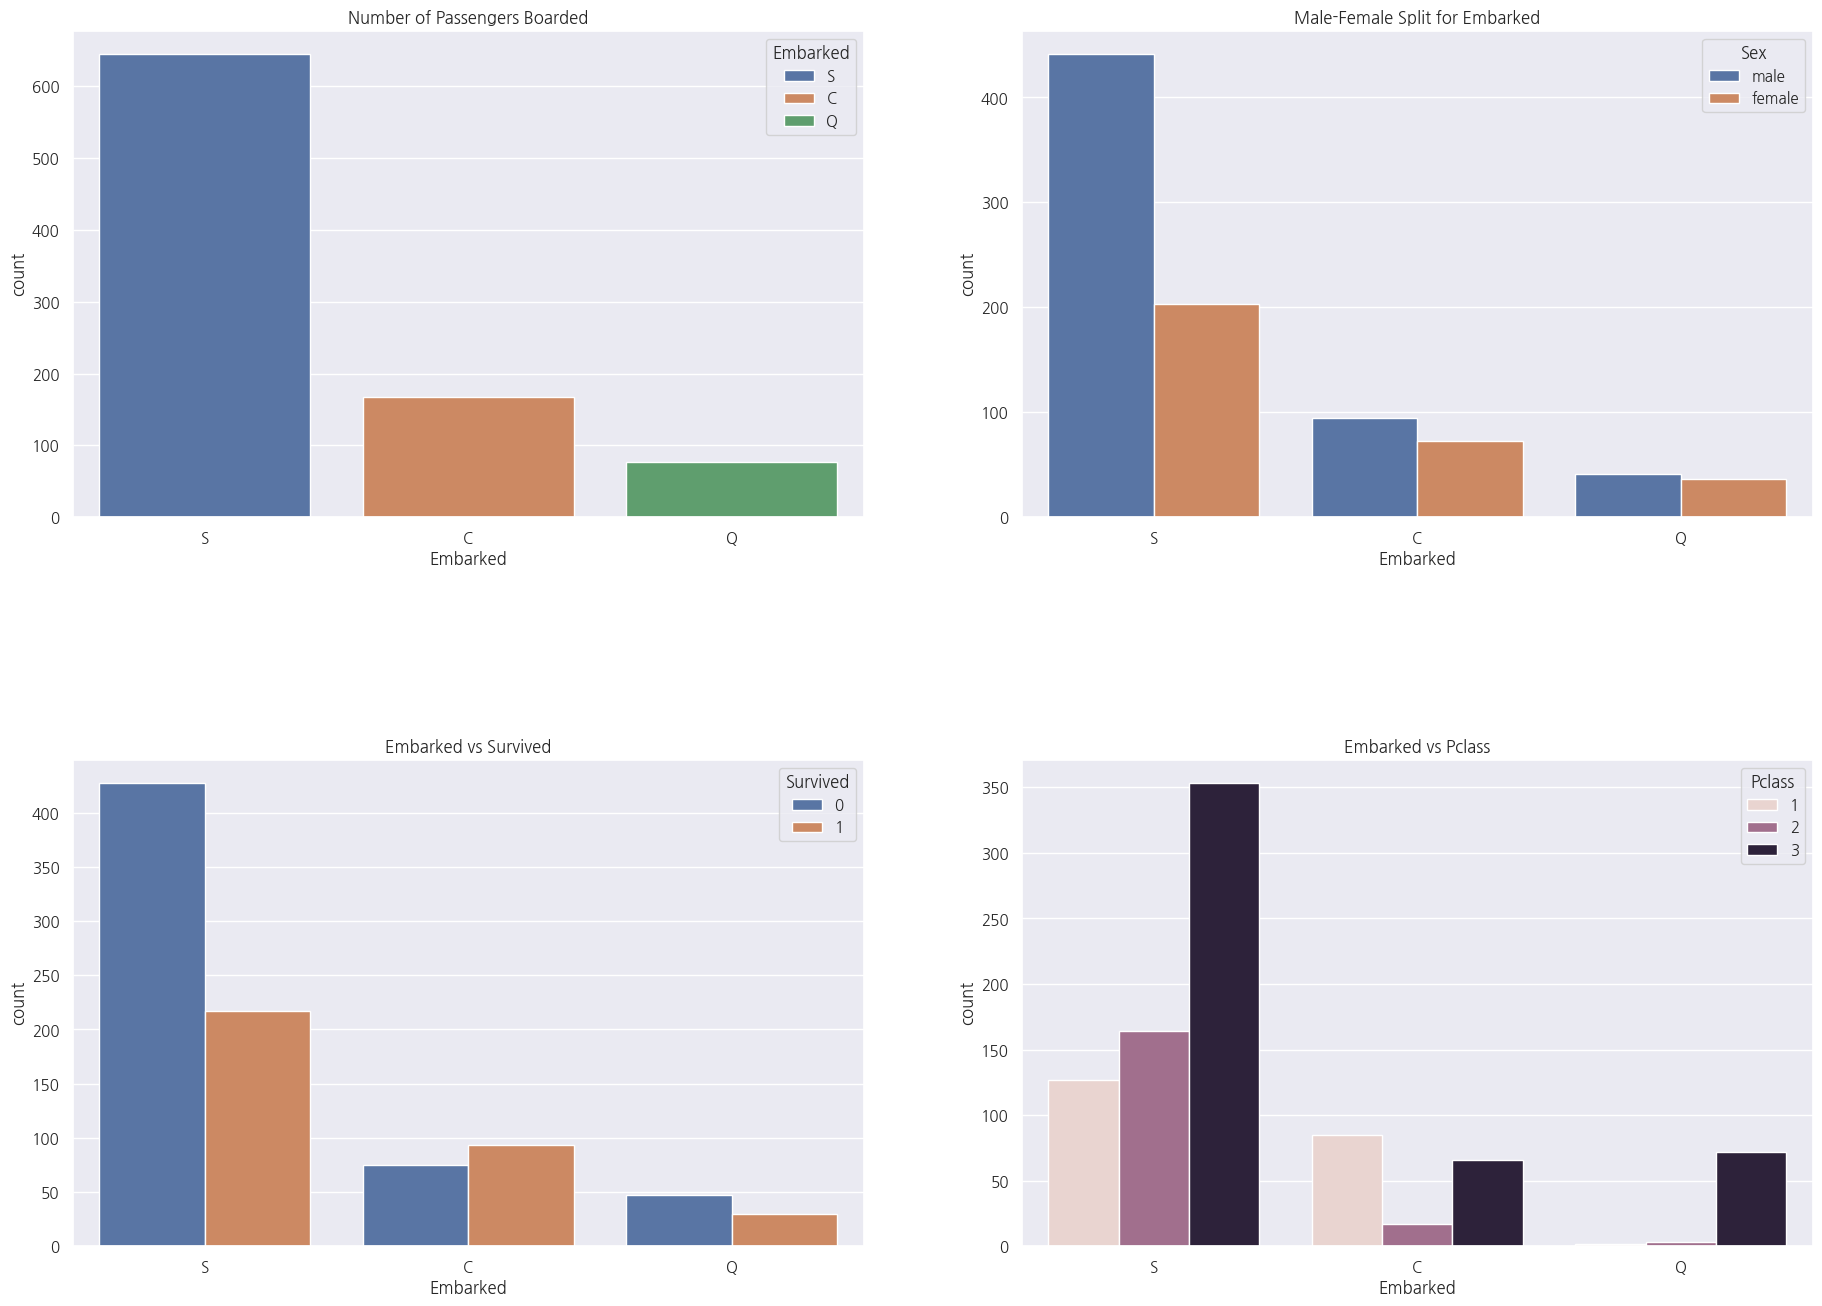

In [61]:
f, ax=plt.subplots(2, 2, figsize=(20,15))
sns.countplot(df_train, x='Embarked', hue='Embarked', ax=ax[0,0])
ax[0,0].set_title('Number of Passengers Boarded')
sns.countplot(df_train, x='Embarked', hue='Sex', ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(df_train, x='Embarked', hue='Survived', ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(df_train, x='Embarked', hue='Pclass', ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- S 항에서 가장 승객이 많이 탑승, 대부분이 Pclass 3 
- C 항에서 승선한 승객의 생존률이 높음. 
- S 에서는 Pclass 1이 많이 승선했지만, Pclass 3도 많이 승선해 사망자 비율이 높음
- Q 승객 중 95% 이상 Pclass 3

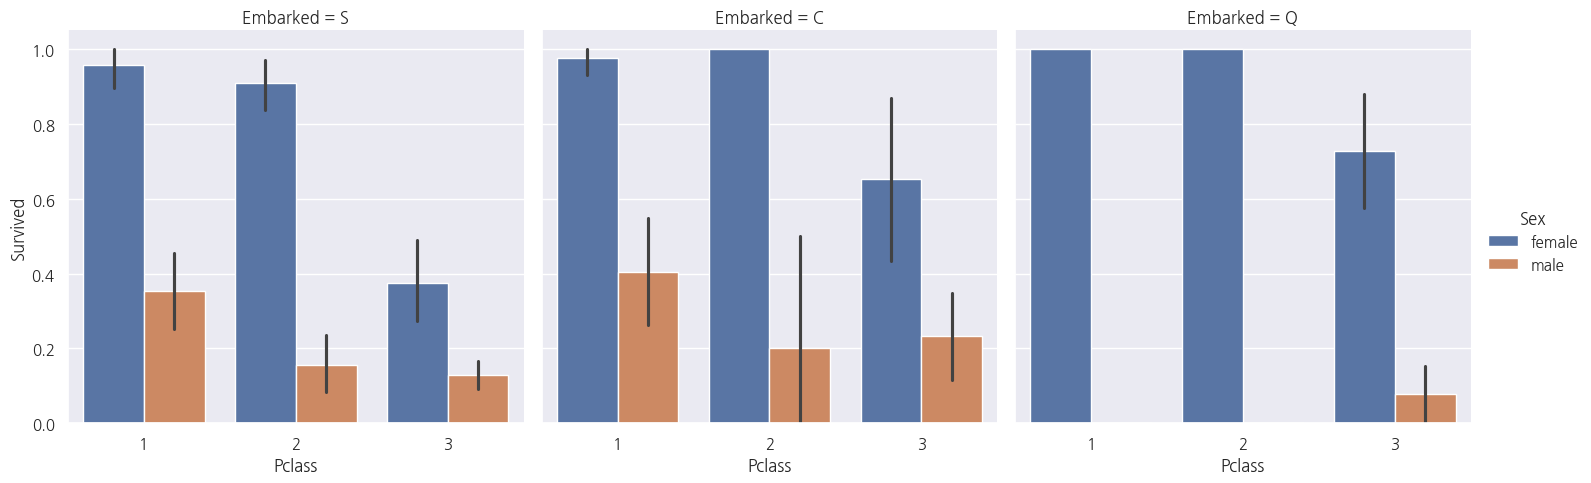

In [64]:
sns.catplot(df_train, x='Pclass', y='Survived', hue='Sex', col='Embarked', kind='bar')
plt.show()

- Embarked 는 2개의 NaN 이 존재
- 대부분이 S에서 승선했으므로 2개의 NaN 값을 S로 채워도 무방

In [65]:
df_train['Embarked'].fillna('S', inplace=True)
df_train['Embarked'].isnull().any()

False

##### 형제 배우자 SibSp

- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife

In [66]:
pd.crosstab([df_train.SibSp], df_train.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


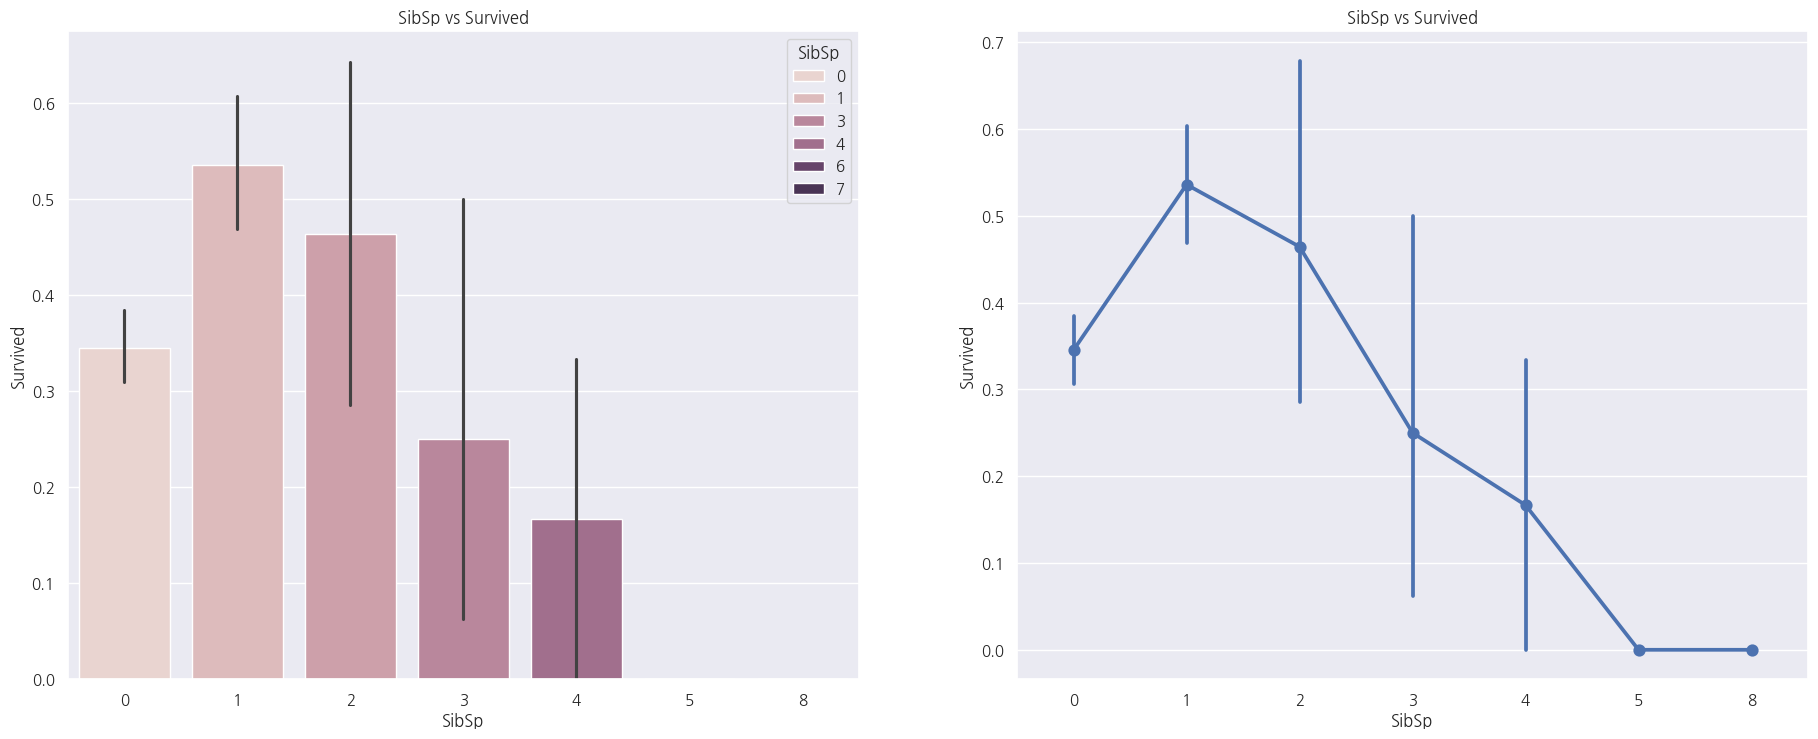

In [70]:
f, ax=plt.subplots(1, 2, figsize=(20,8))
sns.barplot(df_train, x='SibSp', y='Survived', hue='SibSp', ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.pointplot(df_train, x='SibSp', y='Survived', ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.show()

- 혼자 탄 승객이 가장 많음
- 혼자 탄 승객의 경우 약 34% 생존확률
- 같이 탄 가족수가 1보다 많아지면 생존률이 점점 떨어짐
- 5 ~ 8명의 가족과 함께 탑승한 승객의 생존률은 0

##### Parch

- Parent - mother, father
- Child - daughter, son, stepdaughter, stepson

In [88]:
pd.crosstab(df_train.Parch, df_train.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


- Pcalss:3에 가족이 제일 많음

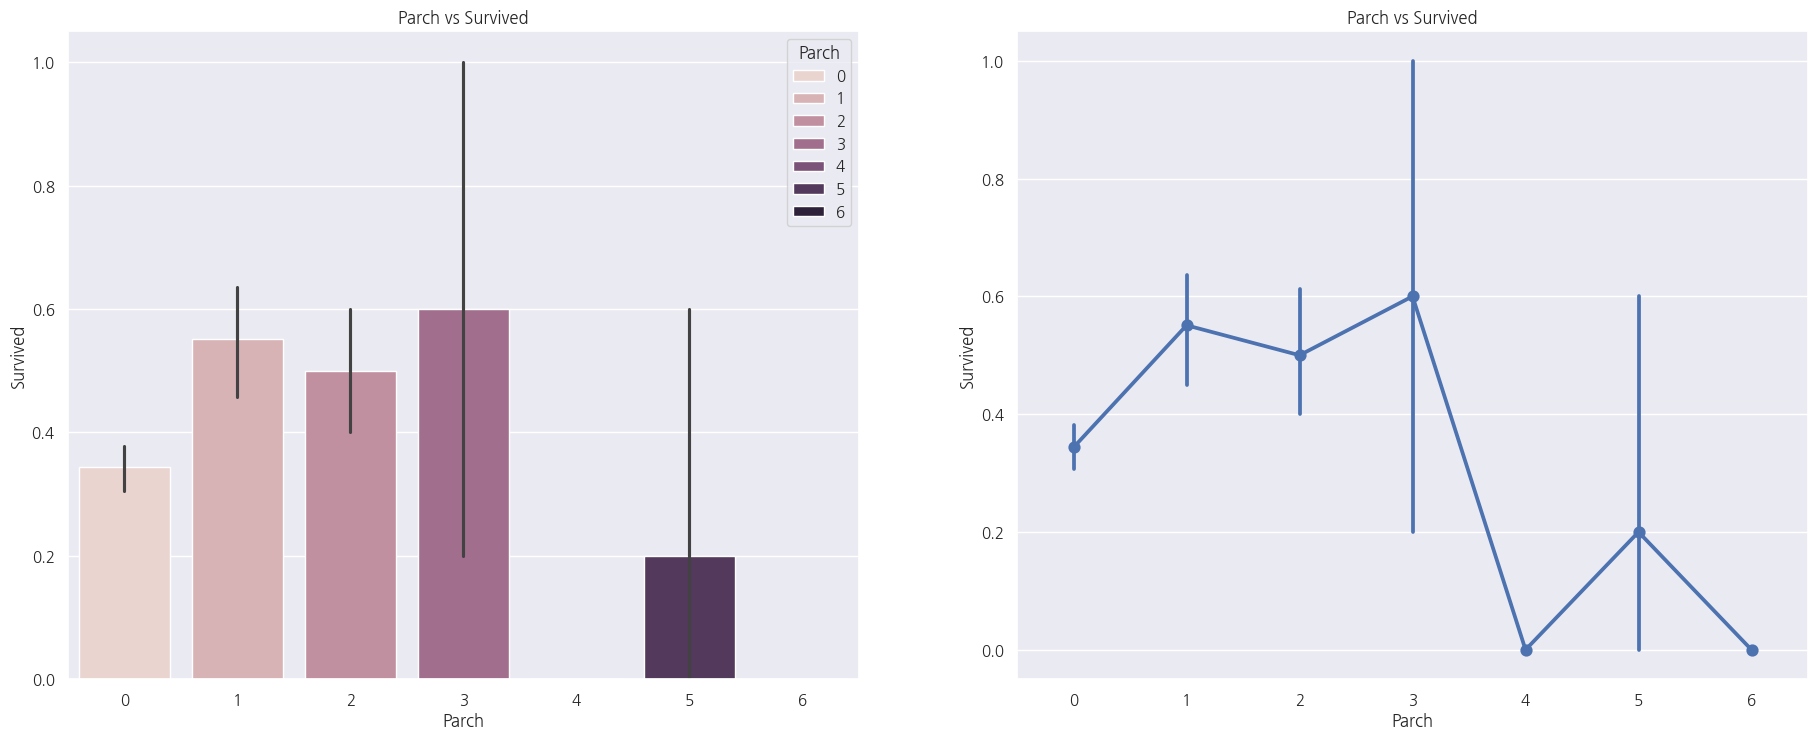

In [74]:
f, ax=plt.subplots(1, 2, figsize=(20, 8))
sns.barplot(df_train, x='Parch', y='Survived', hue='Parch', ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.pointplot(df_train, x='Parch', y='Survived', ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.show()

- Parch는 SibSp 결과와 유사
- 부모와 같이 탄 승객은 생존확률이 높지만 수가 많아지면 감소

##### 비용

In [75]:
print('Highest Fare was :',df_train['Fare'].max())
print('Lowest Fare was :',df_train['Fare'].min())
print('Average Fare was :', df_train['Fare'].mean())

Highest Fare was : 512.3292
Lowest Fare was : 0.0
Average Fare was : 32.204207968574636


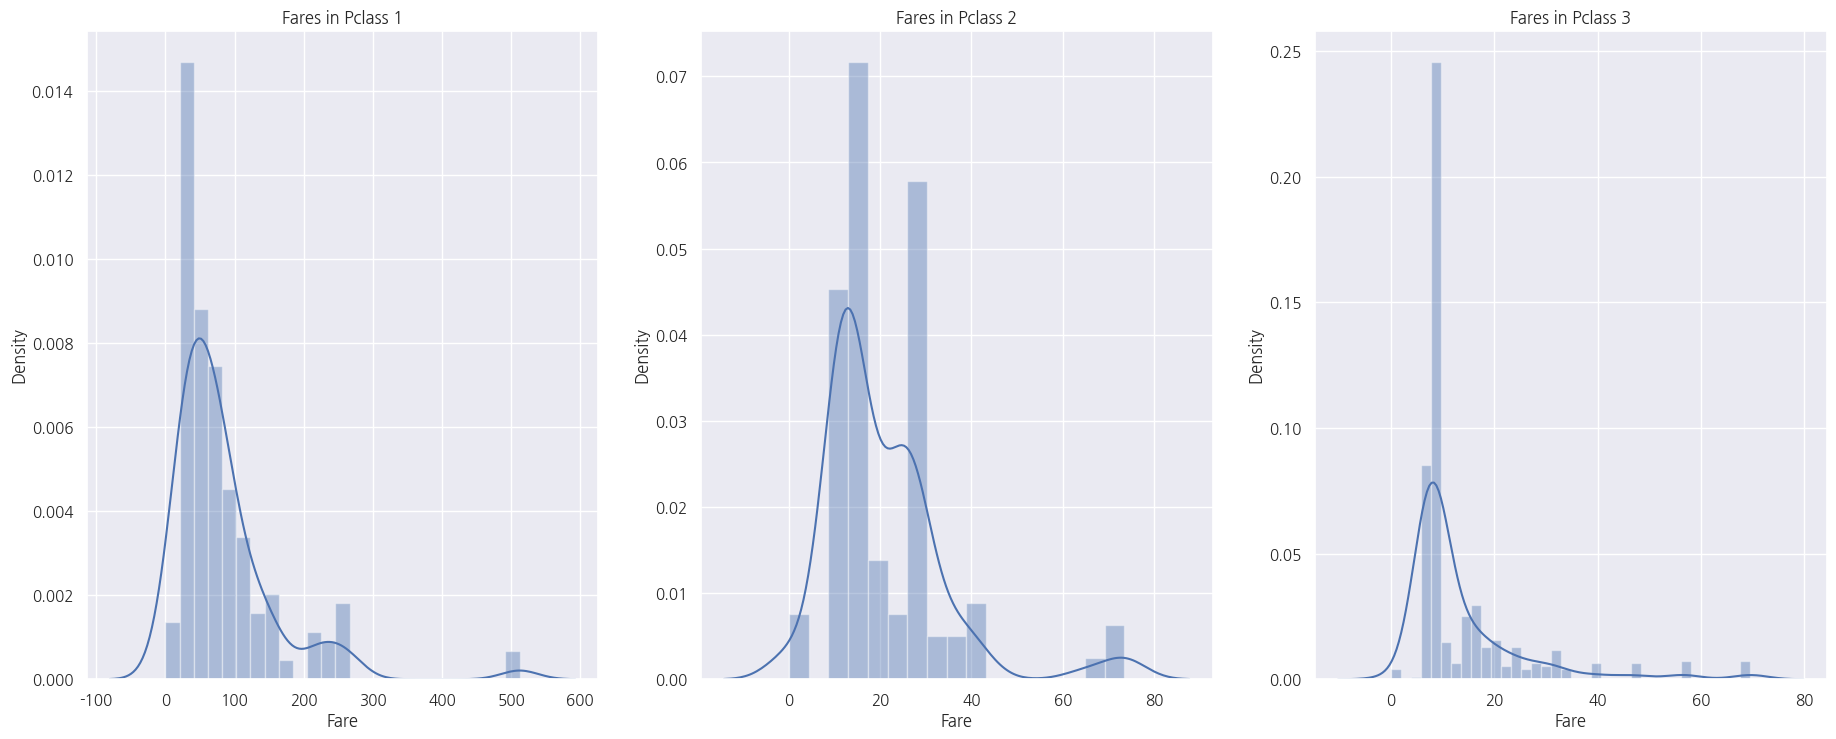

In [76]:
f, ax=plt.subplots(1, 3, figsize=(20, 8))
sns.distplot(df_train[df_train['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(df_train[df_train['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(df_train[df_train['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

- Pclass:1의 승객들이 많은 요금을 지불했고, 나름의 정규분포와 유사한 모습

#### 특성간 상관관계

- Sex - 여성이 더 높은 생존률
- Pclass - 1이 높은 생존률. 3의 생존률은 매우 낮음
- Age - 5~10세 어린이 생존률 높고, 15~35세 사망률 가장 높음
- Embarked - C의 탑승객 생존률이 가장 높음
- SibSp + Parch - SibSp 1 ~ 2 또는 Parch 1 ~ 3 의 승객 생존률이 가장 높음

In [89]:
## 상관관계에 필요없는 컬럼 제거
df_train_corr = df_train.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Initial'], axis=1)

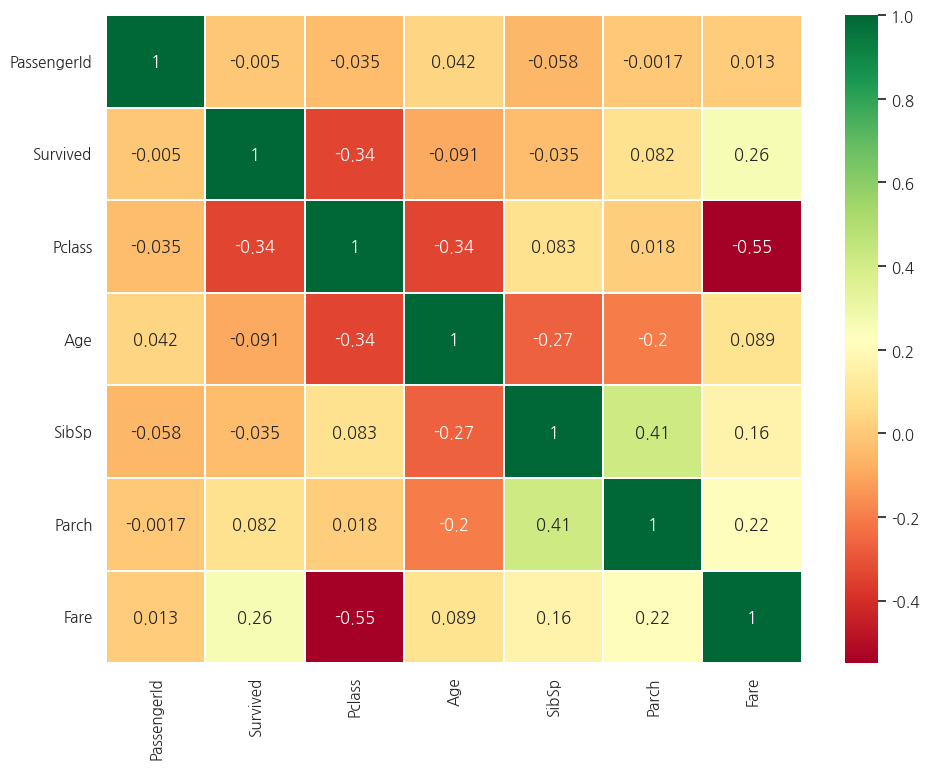

In [90]:
sns.heatmap(df_train_corr.corr(), annot=True, cmap='RdYlGn', linewidth=0.2)
fig=plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

#### Feature Engineering 
- 모든 feature가 다 중요하진 않음. 즉, 제거해야 할 feature가 있을 수 있고, 다른 feature들끼리 조합 새로운 feature를 만들어 낼 수도 있음
- 예로 우리는 Name을 가지고 Initial이라는 새로운 feature 생성

##### Age_band
- 머신러닝 모델에서 continuous data인 Age 대신, categorical value인 Age_band 로 변환
- 80세가 최고령이므로 5개 그룹으로 변경

In [91]:
df_train['Age_band']=0
df_train.loc[df_train['Age']<=16, 'Age_band']=0
df_train.loc[(df_train['Age']>16)&(df_train['Age']<=32), 'Age_band']=1
df_train.loc[(df_train['Age']>32)&(df_train['Age']<=48), 'Age_band']=2
df_train.loc[(df_train['Age']>48)&(df_train['Age']<=64), 'Age_band']=3
df_train.loc[df_train['Age']>64, 'Age_band']=4
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [92]:
df_train['Age_band'].value_counts().sort_index().to_frame().style.background_gradient(cmap='summer_r')

,count
Age_band,
0,104
1,382
2,325
3,69
4,11


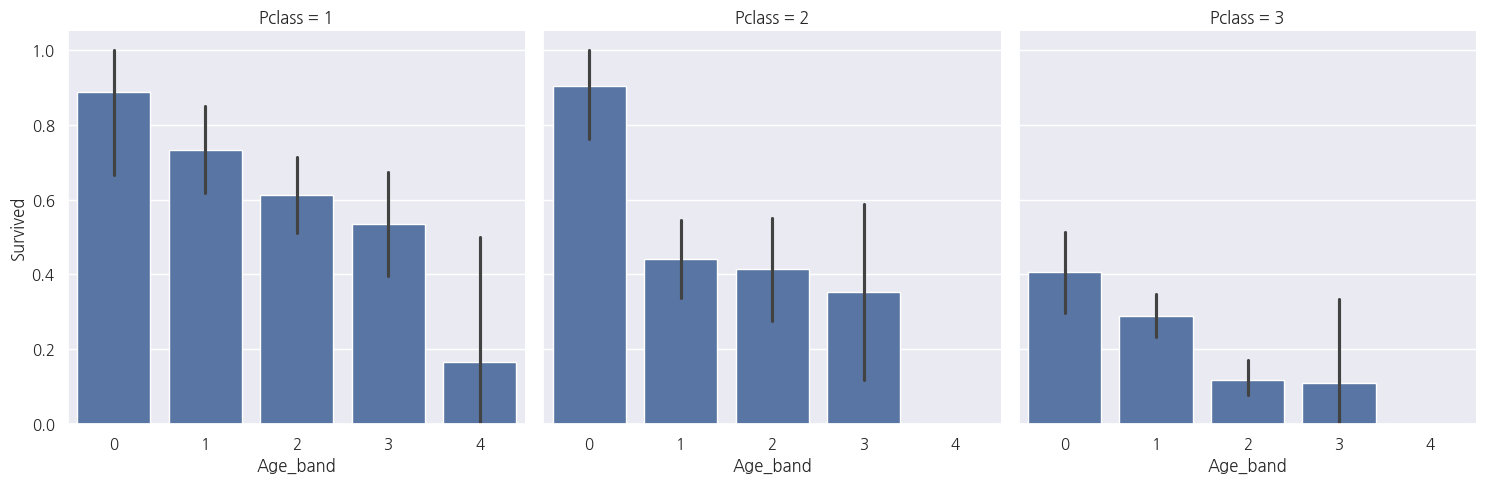

In [97]:
sns.catplot(df_train, x='Age_band', y='Survived', col='Pclass', kind='bar')
plt.show()

##### Family_Size, Alone
- 새로 만들 특성
- Family_Size는 SibSp와 Parch를 더해서 만들고, Family_Size가 0인 경우 Alone은 True

In [98]:
df_train['Family_Size']=0
df_train['Family_Size']=df_train['SibSp']+df_train['Parch']
df_train['Alone']=0
df_train.loc[df_train.Family_Size==0, 'Alone']=1

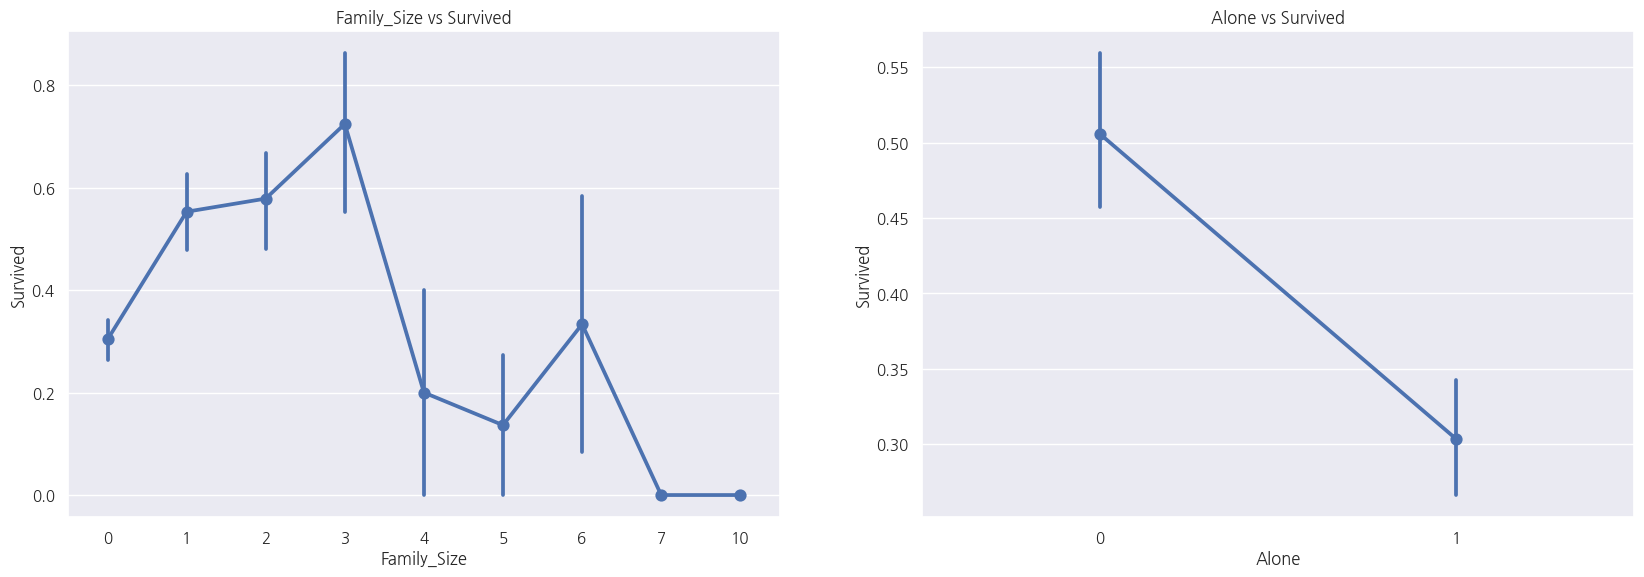

In [99]:
f, ax=plt.subplots(1, 2, figsize=(18, 6))
sns.pointplot(df_train, x='Family_Size', y='Survived', ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.pointplot(df_train, x='Alone', y='Survived', ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.show()

##### Fare_Range


In [100]:
df_train['Fare_Range']=pd.qcut(df_train['Fare'], 4)
df_train.groupby(['Fare_Range'])['Survived'].count().to_frame()

,Survived
Fare_Range,
"(-0.001, 7.91]",223
"(7.91, 14.454]",224
"(14.454, 31.0]",222
"(31.0, 512.329]",222


In [101]:
df_train.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


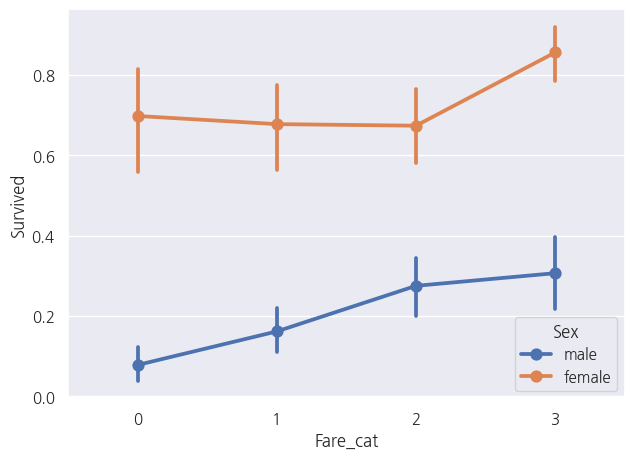

In [102]:
df_train['Fare_cat']=0
df_train.loc[df_train['Fare']<=7.91, 'Fare_cat']=0
df_train.loc[(df_train['Fare']>7.91)&(df_train['Fare']<=14.454), 'Fare_cat']=1
df_train.loc[(df_train['Fare']>14.454)&(df_train['Fare']<=31.0), 'Fare_cat']=2
df_train.loc[df_train['Fare']>31.0, 'Fare_cat']=3

sns.pointplot(df_train, x='Fare_cat', y='Survived', hue='Sex')
plt.show()

##### Convert String to Numeric

- 머신러닝 모델이 인자로 받아들일 수 있도록 string type의 feature를 numeric한 type으로 변환

- pd.get_dummies() 의 문제 확인 One-hot encoding 보다는 label encoding 처리 확인요 


### 모델링

- 사이킷런 사용, 생존여부 분류모델 

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

In [112]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone,Fare_Range,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,0,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0,1,"(7.91, 14.454]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Other,1,0,1,"(7.91, 14.454]",1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,1,0,1,"(14.454, 31.0]",2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,23.4500,NaN,S,Miss,1,3,0,"(14.454, 31.0]",2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,1,0,1,"(14.454, 31.0]",2


In [121]:
df_train = df_train[['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare','Sex','Embarked'] ]

In [123]:
le = preprocessing.LabelEncoder()
le.fit(df_train['Sex'])
df_train['Sex'] = le.transform(df_train['Sex'])

In [124]:
le2 = preprocessing.LabelEncoder()
le2.fit(df_train['Embarked'])
df_train['Embarked'] = le2.transform(df_train['Embarked'])

In [126]:
data = df_train[df_train.columns[1:]]
target = df_train['Survived'].values
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=0, stratify=target)
X = df_train[df_train.columns[1:]]
Y = df_train['Survived']

#### Logistic Regression

In [127]:
model = LogisticRegression()
model.fit(x_train, y_train)
prediction1 = model.predict(x_test)
print('Accuracy of Logistic Regression is',metrics.accuracy_score(prediction1, y_test))

Accuracy of Logistic Regression is 1.0


#### Linear SVM

In [128]:
model=svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(x_train, y_train)
prediction2=model.predict(x_test)
print('Accuracy of linear SVM is',metrics.accuracy_score(prediction2, y_test))

Accuracy of linear SVM is 1.0


#### rbf SVM

In [129]:
model=svm.SVC(kernel='rbf', C=0.1, gamma=0.1)
model.fit(x_train, y_train)
prediction3=model.predict(x_test)
print('Accuracy of rbf SVM is',metrics.accuracy_score(prediction3, y_test))

Accuracy of rbf SVM is 0.6156716417910447


#### Decision Tree

In [130]:
model=DecisionTreeClassifier()
model.fit(x_train, y_train)
prediction4=model.predict(x_test)
print('Accuracy of Decision Tree is',metrics.accuracy_score(prediction4, y_test))

Accuracy of Decision Tree is 1.0


#### Random Forest

In [131]:
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)
prediction5=model.predict(x_test)
print('Accuracy of Random Forests is',metrics.accuracy_score(prediction5, y_test))

Accuracy of Random Forests is 1.0


#### Naive Bayes

In [132]:
model=GaussianNB()
model.fit(x_train, y_train)
prediction6=model.predict(x_test)
print('Accuracy of Naive Bayes is',metrics.accuracy_score(prediction6, y_test))

Accuracy of Naive Bayes is 1.0


#### K-Nearest Neighbors

In [133]:
model=KNeighborsClassifier()
model.fit(x_train, y_train)
prediction7=model.predict(x_test)
print('Accuracy of KNN is',metrics.accuracy_score(prediction7, y_test))

Accuracy of KNN is 0.753731343283582


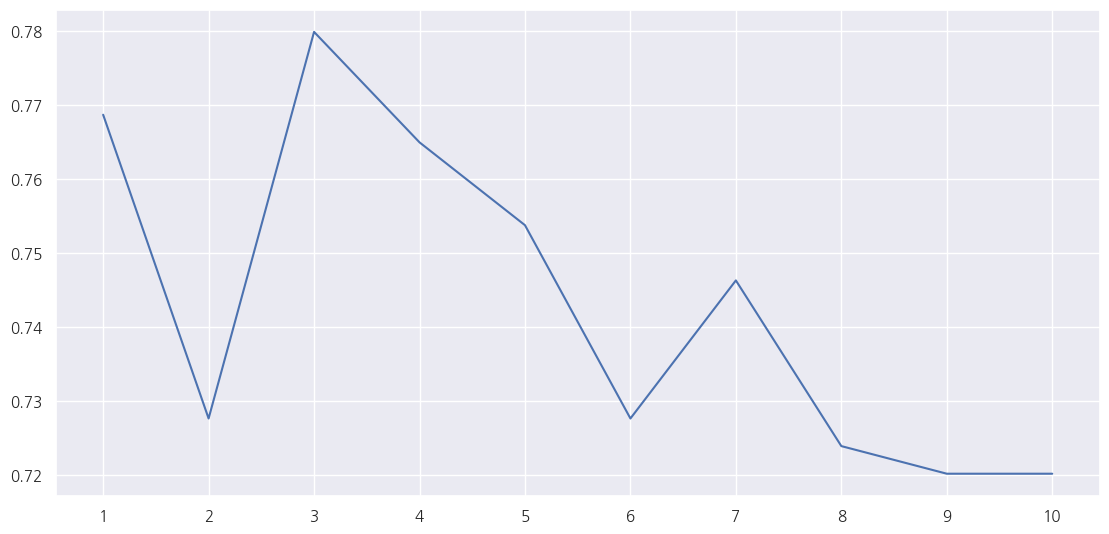

Accuracies for different values of n are: [0.7686567164179104, 0.7276119402985075, 0.7798507462686567, 0.7649253731343284, 0.753731343283582, 0.7276119402985075, 0.746268656716418, 0.7238805970149254, 0.7201492537313433, 0.7201492537313433] with the max value as  0.7798507462686567


In [134]:
a_index=list(range(1,11))
accuracies=[]

for i in a_index:
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    prediction=model.predict(x_test)
    accuracies.append(metrics.accuracy_score(prediction, y_test))

plt.plot(a_index, accuracies)
plt.xticks(a_index)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',accuracies,'with the max value as ',max(accuracies))

### 교차검증

In [135]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

kfold = KFold(n_splits=10, shuffle=True, random_state=0)
xyz=[]
accuracy=[]
std=[]
classifiers=['Logistic Regression', 'Linear SVM', 'Radial SVM', 'Decision Tree', 'Random Forest', 'KNN']
models=[LogisticRegression(), svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'), DecisionTreeClassifier(), RandomForestClassifier(n_estimators=100), KNeighborsClassifier(n_neighbors=9)]
for model in models:
    cv_result = cross_val_score(model,X,Y, cv=kfold, scoring='accuracy')
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz, 'Std':std}, index=classifiers)
new_models_dataframe2

,CV Mean,Std
Logistic Regression,1.000000,0.000000
Linear SVM,1.000000,0.000000
Radial SVM,0.683521,0.059296
Decision Tree,1.000000,0.000000
Random Forest,1.000000,0.000000
KNN,0.749725,0.040168


<Axes: >

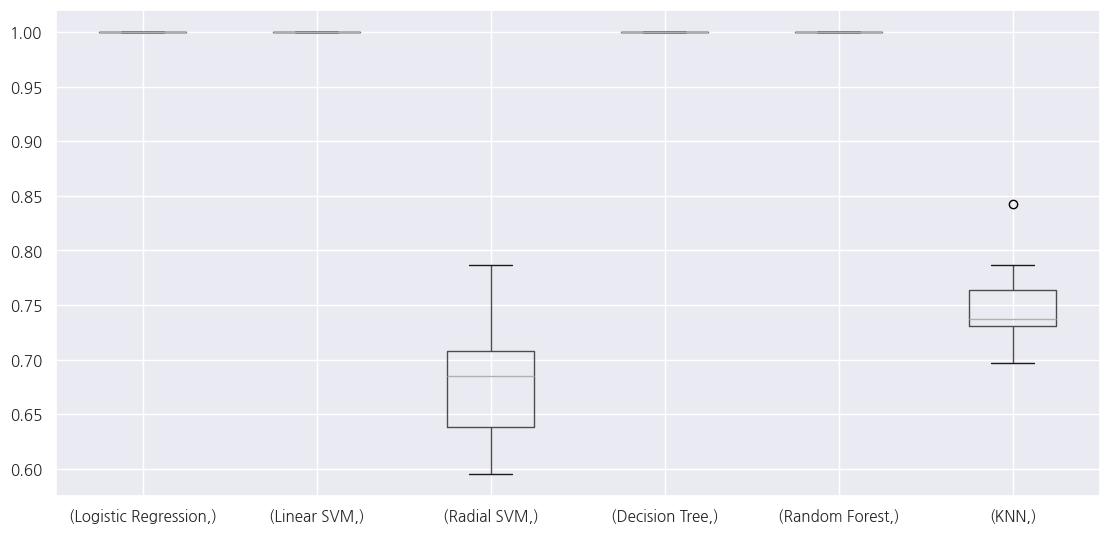

In [137]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

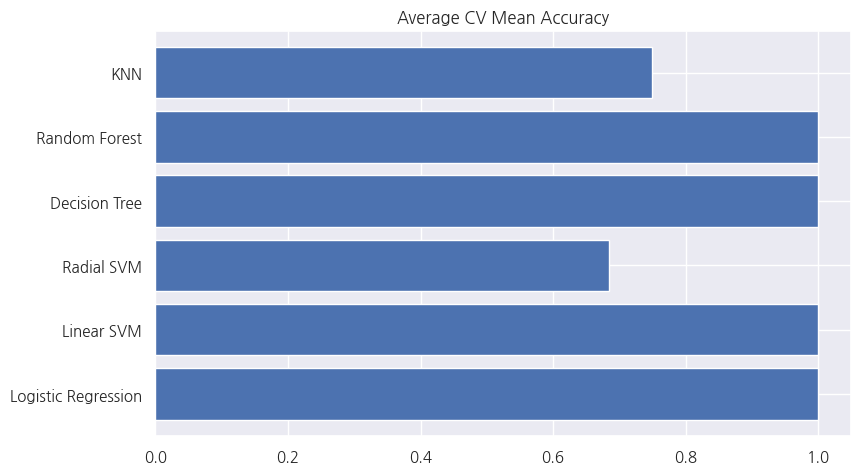

In [138]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

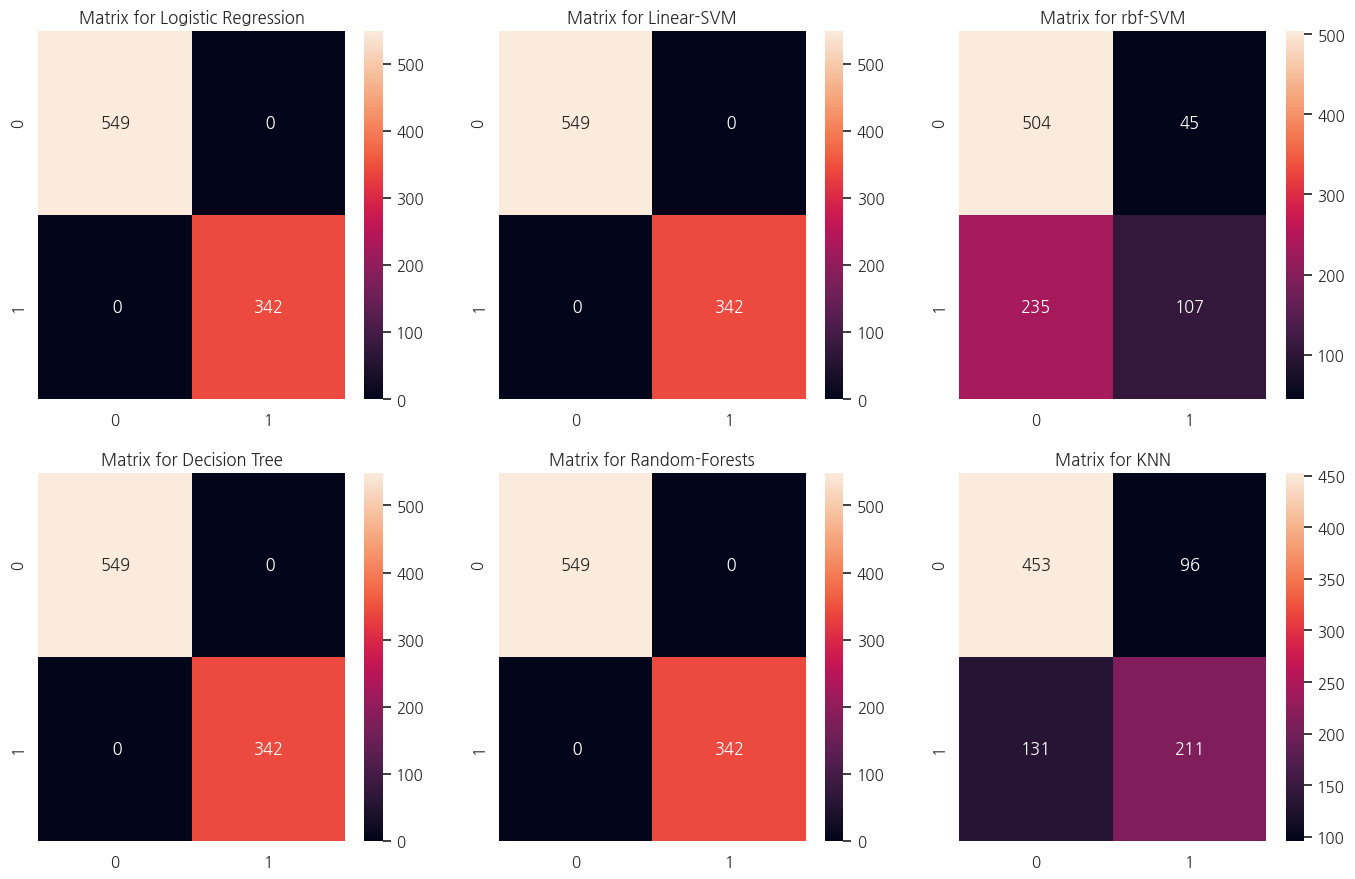

In [140]:
f,ax=plt.subplots(2,3,figsize=(15,10))
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for KNN')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

In [139]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.828340970435001
SVC(C=1, gamma=0.1)


- https://velog.io/@hyungraelee/Titanic-with-EDA#1-exploratory-data-analysiseda